<hr/> <h1 style="text-align: center;"><span style="color: #666699;"<em><strong>  Regression Linéaire : Projet Fish </strong></em></span></h1><hr /> 

In [1]:
# Importation des packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Couleurs
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
# Chargement des données
data = pd.read_csv('Fish.csv')

In [3]:
# Affichage des premières lignes
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Dimensions du dataframe
data.shape

(159, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# Recherche de données manquantes
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
# Liste des colonnes
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

### Analyse univariée

In [8]:
# Statistiques descriptives
data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


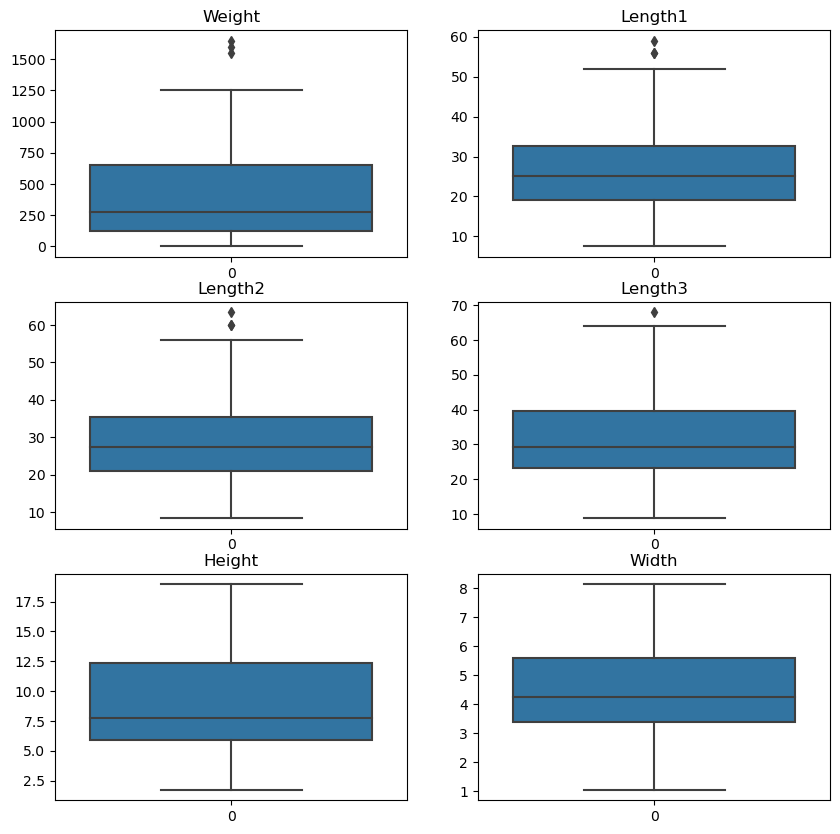

In [9]:
# Recherche de données abérantes 
fig,axs = plt.subplots(3,2,figsize=(10,10))
for i, col in enumerate(data.columns[1:],1):
    plt.subplot(3,2,i)
    sns.boxplot(data[col])
    plt.title(col)

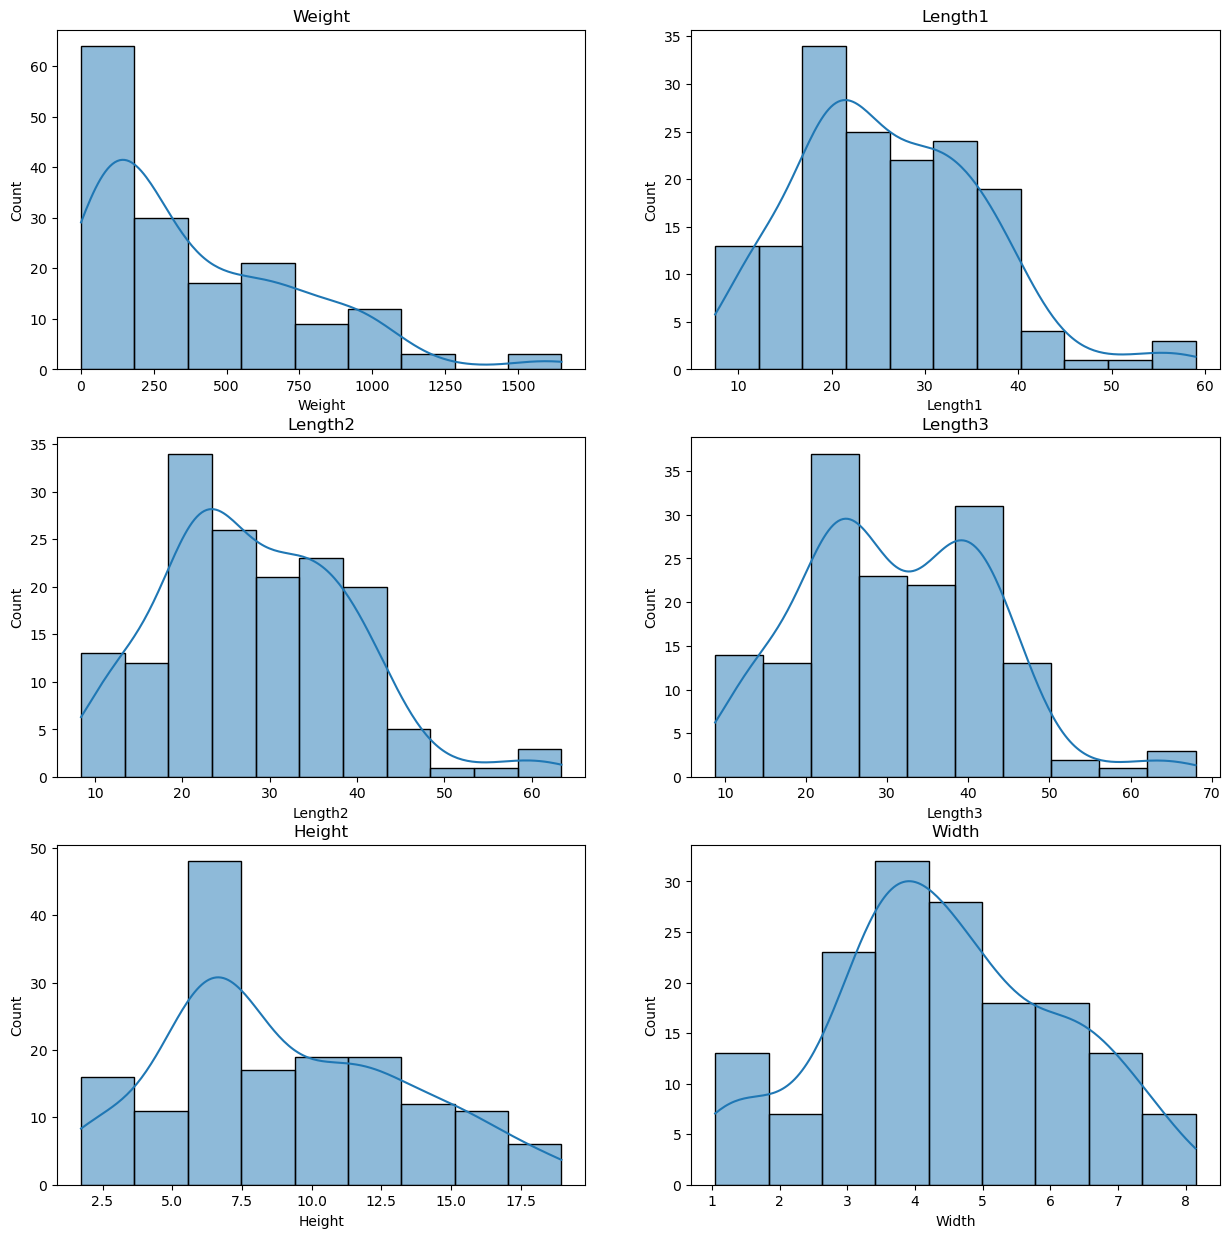

In [10]:
# Analyse de la normalité des variables quantitatives
fig,axs = plt.subplots(3,2,figsize=(15,15))
for i, col in enumerate(data.columns[1:],1):
    plt.subplot(3,2,i)
    sns.histplot(data[col],kde=True)
    plt.title(col)

In [11]:
# Test de normalité de Shapiro
normalite = []
p_values = []
for col in data.columns[1:] :
    stats,p_value = shapiro(data[col])
    p_values.append(p_value)
    if p_value > 0.05 :
        normalite.append("OUI")
    else :
        normalite.append("NON")
print(pd.DataFrame({"Variables":data.columns[1:],"P-Valeurs":p_values,"Normalite":normalite}))

  Variables     P-Valeurs Normalite
0    Weight  7.605609e-10       NON
1   Length1  1.771093e-03       NON
2   Length2  3.053079e-03       NON
3   Length3  2.963098e-03       NON
4    Height  1.852383e-04       NON
5     Width  1.536440e-02       NON


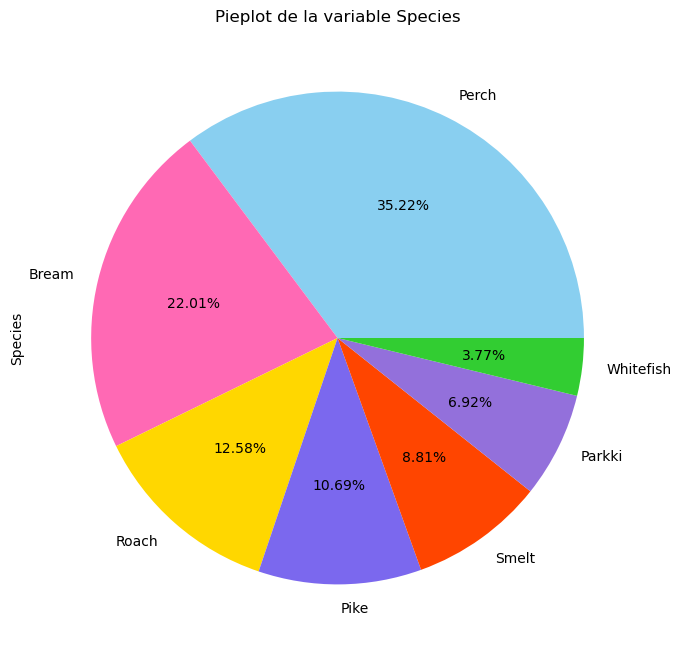

In [54]:
plt.figure(figsize=(8,8))
data.Species.value_counts().plot.pie(autopct='%1.2f%%',colors=colors)
plt.title("Pieplot de la variable Species")
plt.show()

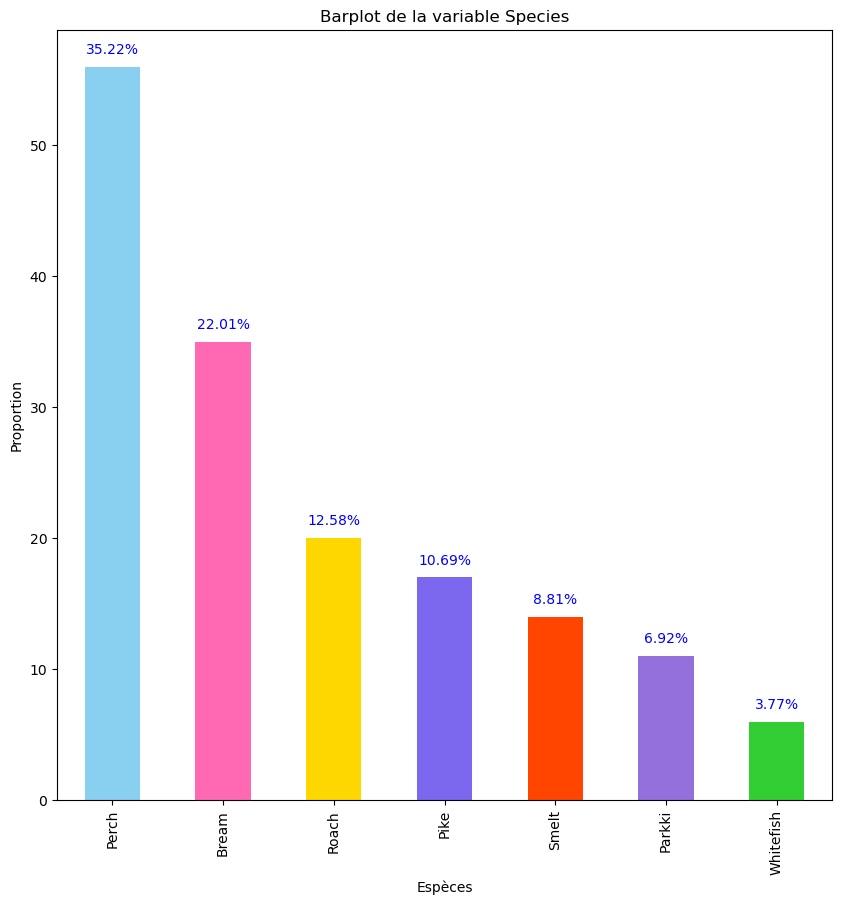

In [13]:
barplot = data.Species.value_counts().plot.bar(color=colors,figsize=(10,10))
plt.xlabel("Espèces")
plt.ylabel("Proportion")
plt.title("Barplot de la variable Species")
for bar in barplot.patches:
    barplot.annotate((f"{bar.get_height()/data.shape[0]*100:.2f}%"), 
                     (bar.get_x() + 0.25, bar.get_height() + 1), 
                ha = 'center',color = 'b')

# Analyse bivariée
Essayons de voir la relation entre la variable cible Weight et les autres variables

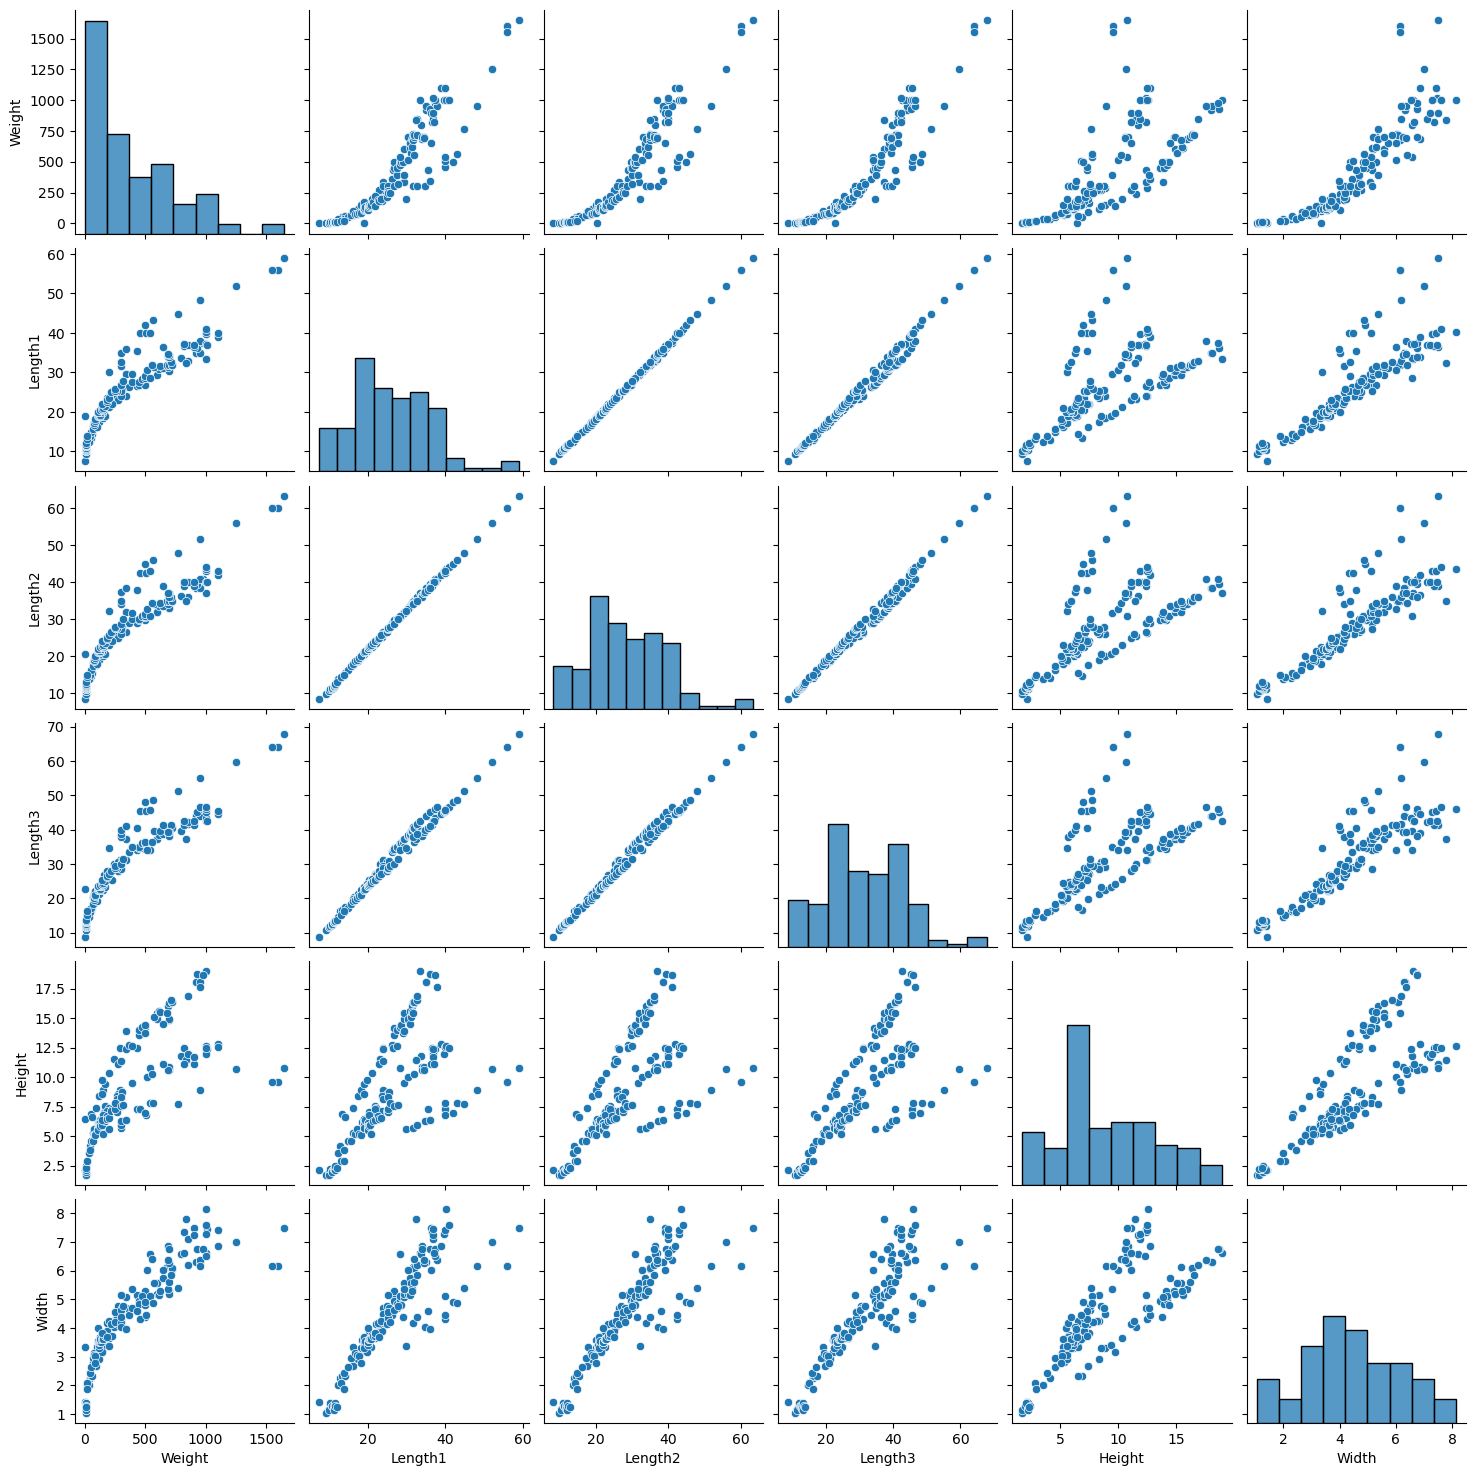

In [14]:
sns.pairplot(data)

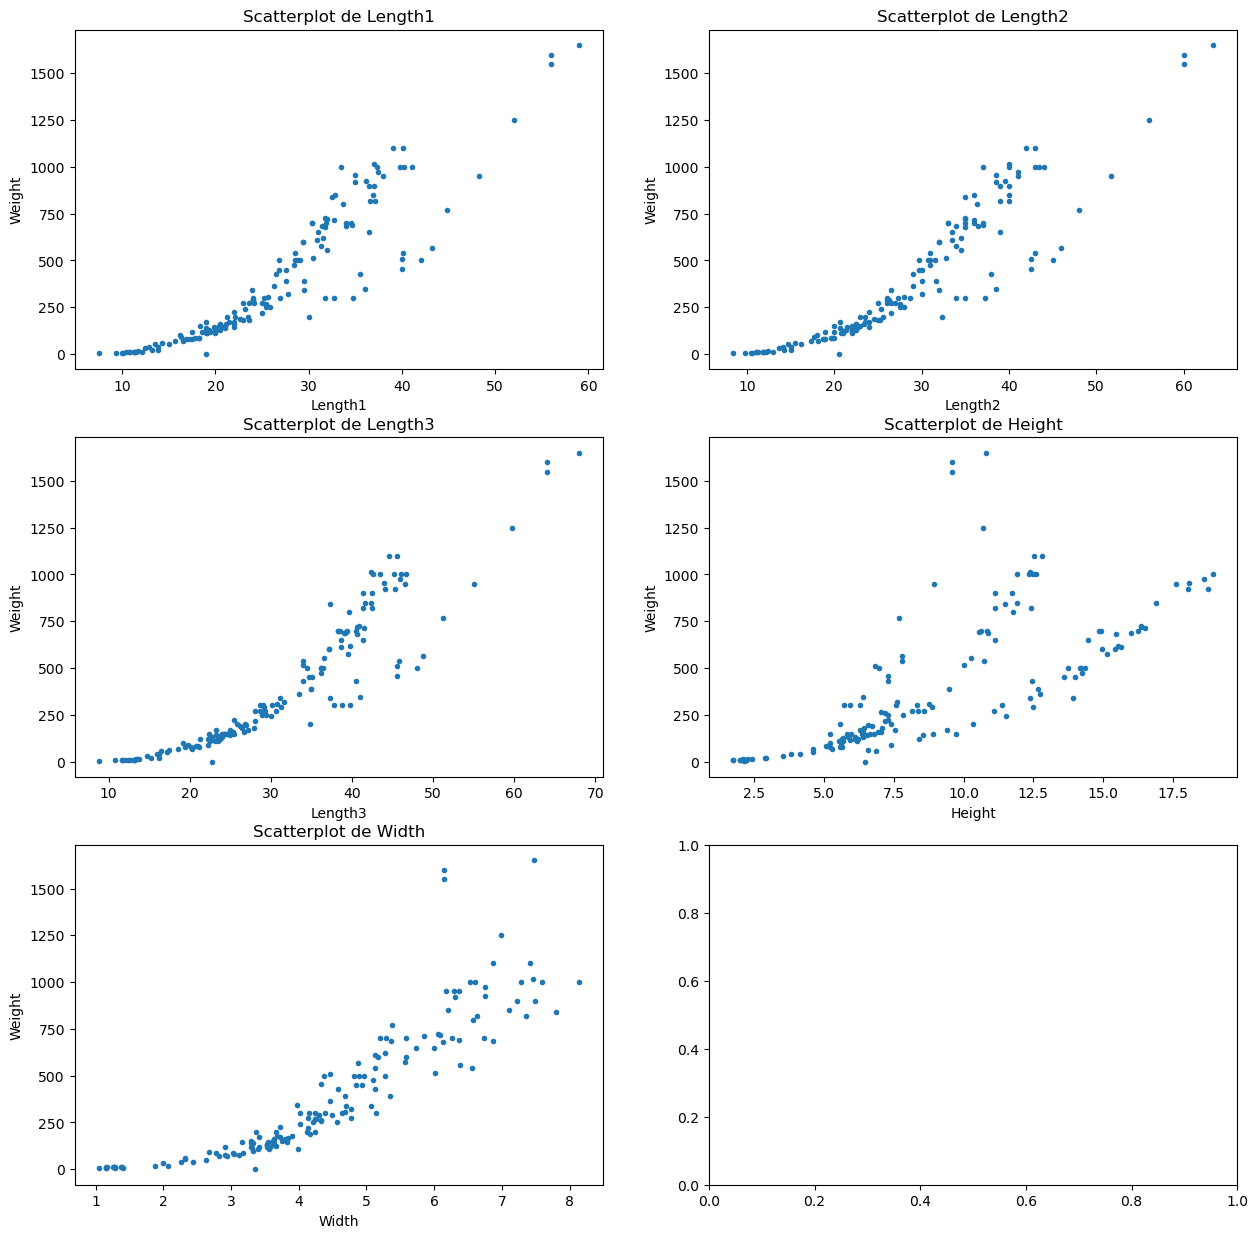

In [15]:
# Nuage de points des variables explicatives quantitatives par rapport à la variable Weight
fig,axs = plt.subplots(3,2,figsize=(15,15))
for i, col in enumerate(data.columns[2:],1):
    plt.subplot(3,2,i)
    plt.plot(data[col],data["Weight"],'.')
    plt.xlabel(col)
    plt.ylabel("Weight")
    plt.title(f"Scatterplot de {col}")

<Axes: >

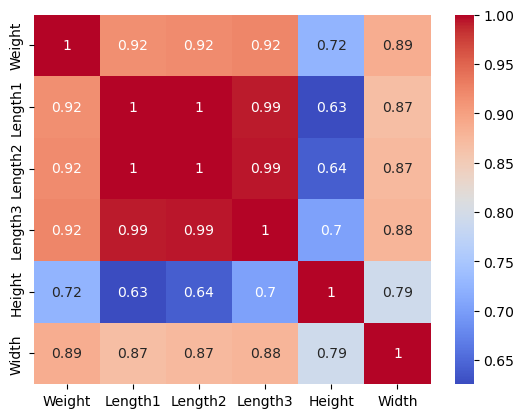

In [16]:
# Tableau de corrélation 
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

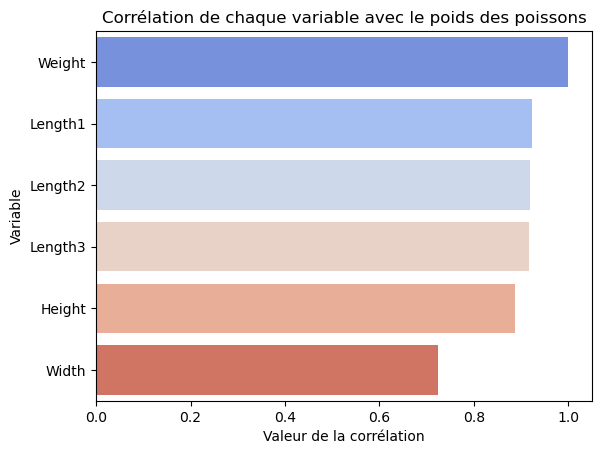

In [17]:
# Visualtion de la corrélation entre les variables et le variable d'intérêt Weight
sns.barplot(x=corr["Weight"].sort_values(ascending=False),y=corr.index,palette='coolwarm')
plt.xlabel("Valeur de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec le poids des poissons")
plt.show()

Text(0.5, 1.0, 'Evolution du poids en fonction des expèces de poissons')

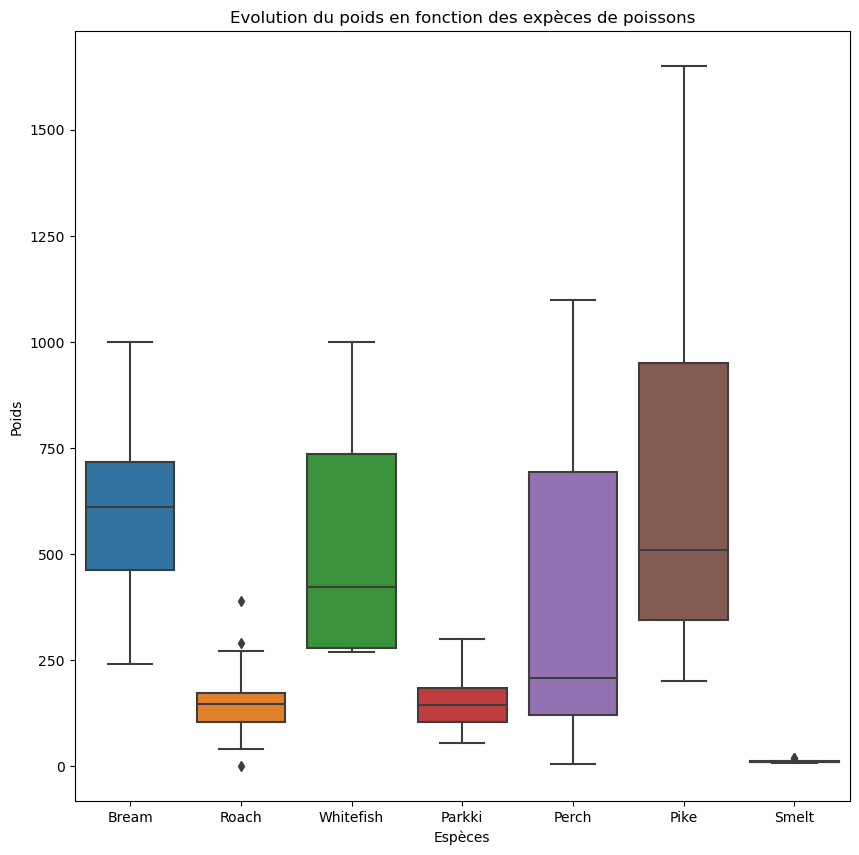

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x="Species",y="Weight")
plt.xlabel("Espèces")
plt.ylabel("Poids")
plt.title("Evolution du poids en fonction des expèces de poissons")

# Mise en place d'une ACP

In [19]:
# Séparation des données
data_quant = data.drop("Species",axis=1)

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_quant)

In [21]:
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

In [22]:
# Choix des axes factoriels
table = pd.DataFrame({"Dimensions":["Dim" + str(x + 1) for x in range(data_quant.shape[1])],
                     "Valeur_propre":pca.explained_variance_,
                     "%_variance_expliquee":pca.explained_variance_ratio_*100,
                     "%_cumule_variance_expliquee":np.cumsum(pca.explained_variance_ratio_*100)})
table

,Dimension,Valeur_propre,%_variance_expliquee,%_cumule_variance_expliquee
0,Dim1,5.303159,87.830089,87.830089
1,Dim2,0.513744,8.508548,96.338637
2,Dim3,0.121064,2.005042,98.343679
3,Dim4,0.098144,1.625452,99.969131
4,Dim5,0.001585,0.026244,99.995375
5,Dim6,0.000279,0.004625,100.000000


Text(0.5, 1.0, 'Pourcentage de variance expliquée par dimension')

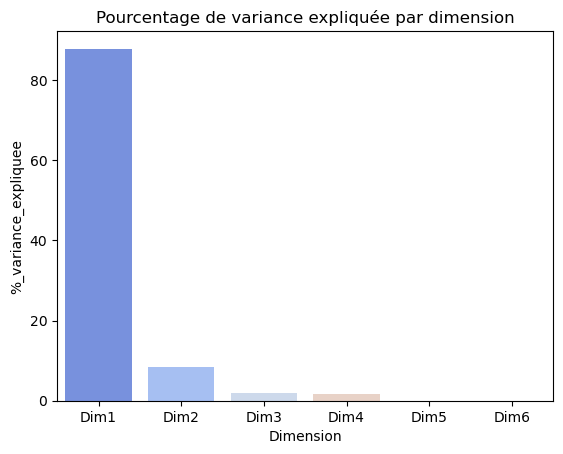

In [23]:
sns.barplot(x=table['Dimension'],y=table["%_variance_expliquee"].sort_values(ascending=False),palette='coolwarm')
plt.title("Pourcentage de variance expliquée par dimension")

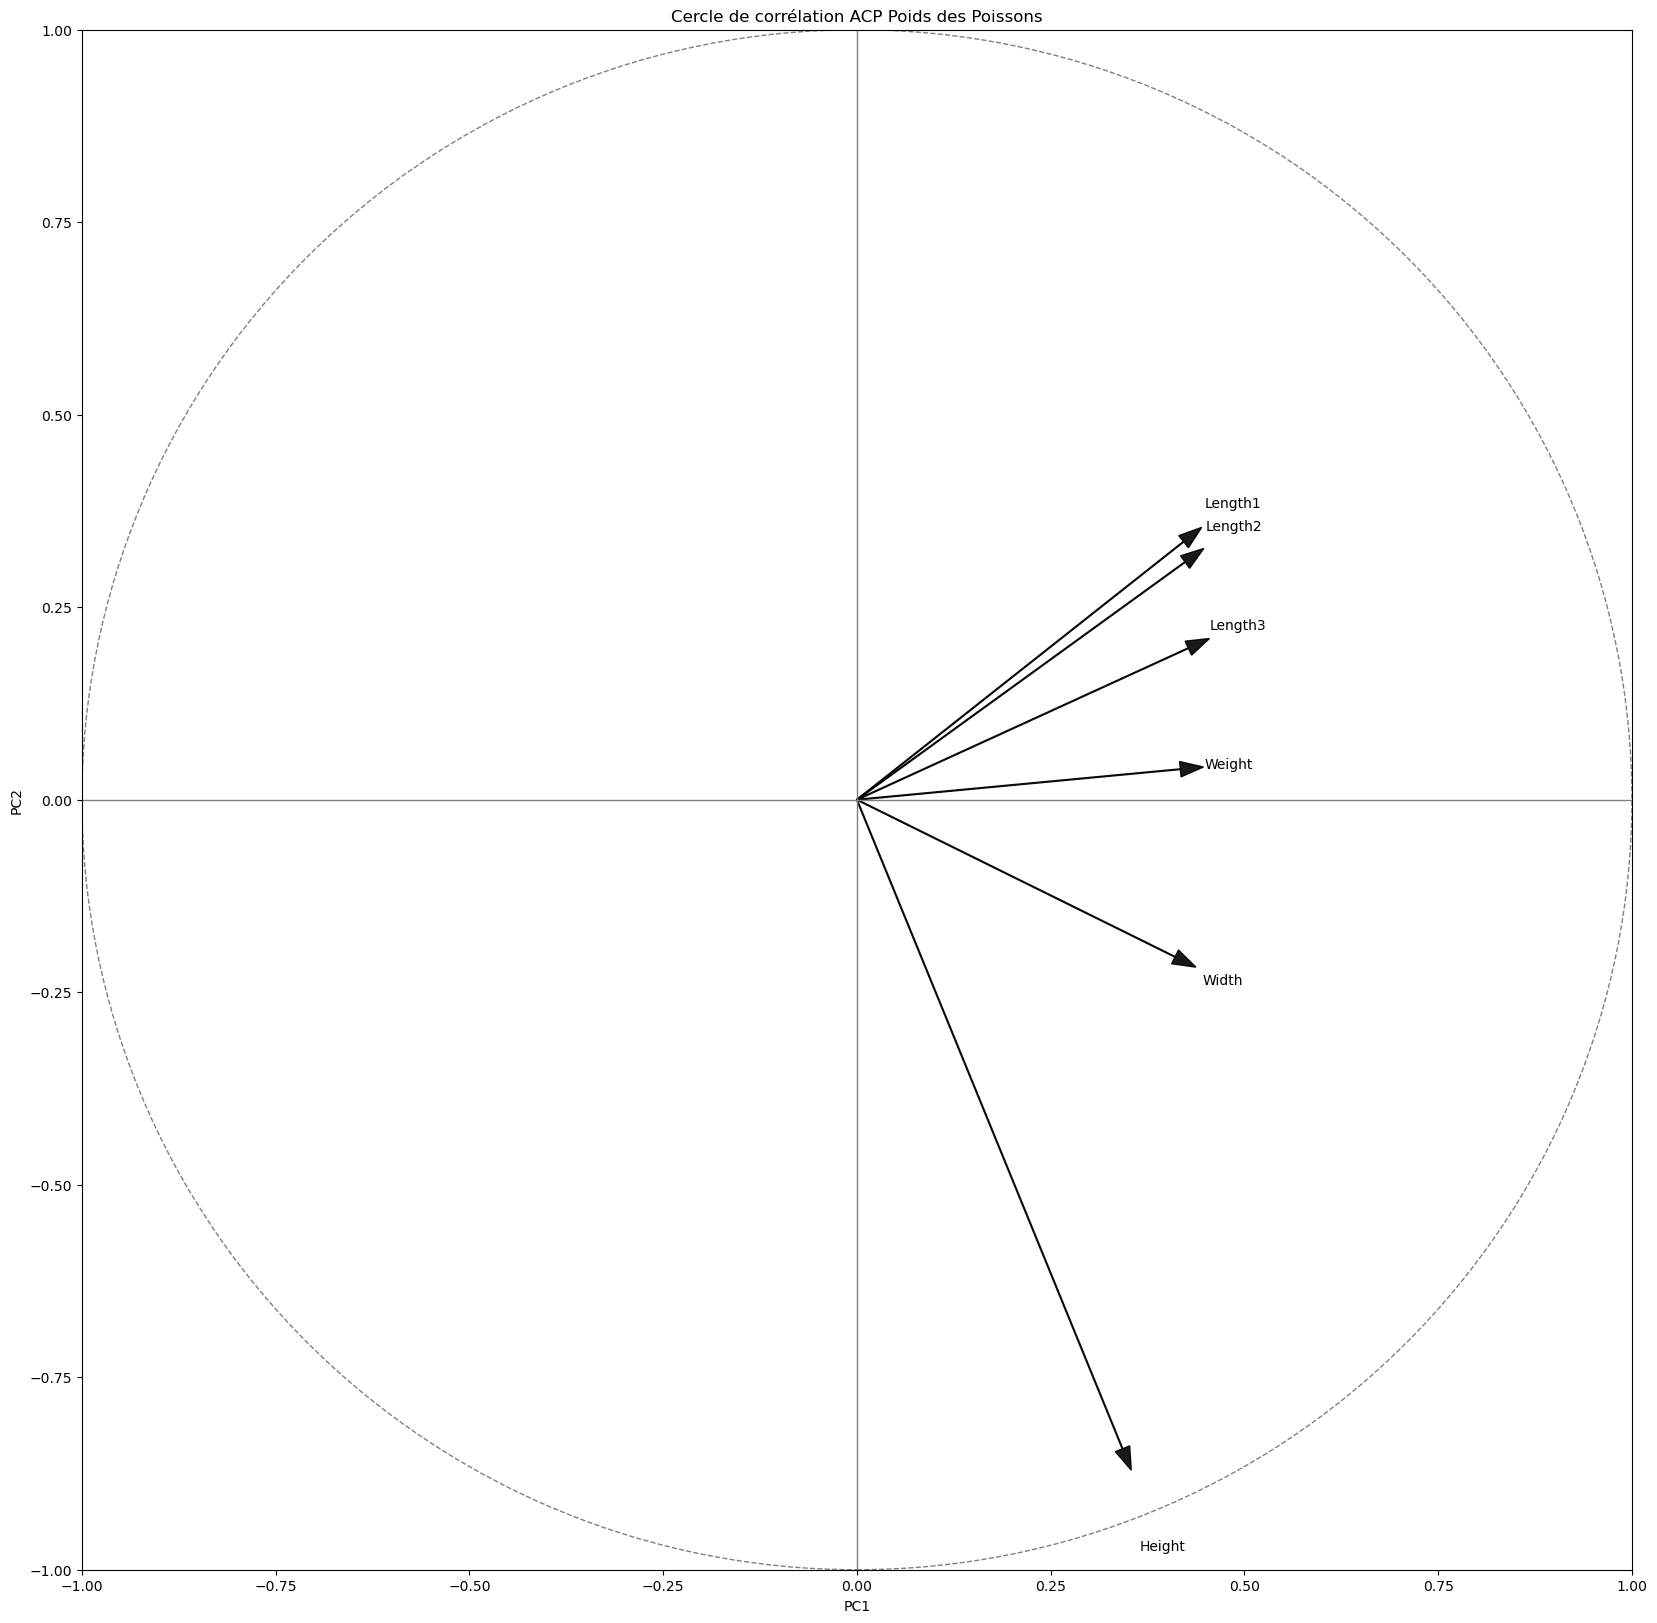

In [24]:
# Représentation graphique

# Récupérer les deux premiers axes factoriels
coeff = np.transpose(pca.components_[0:2, :])

n = 6 # Nombre de vecteurs à placer


plt.figure(figsize=(20, 20))

# Projeter les variables sur les axes factoriels
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data_quant.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Poids des Poissons')

# Afficher la figure
plt.show()

In [25]:
species = list(data.Species.unique())

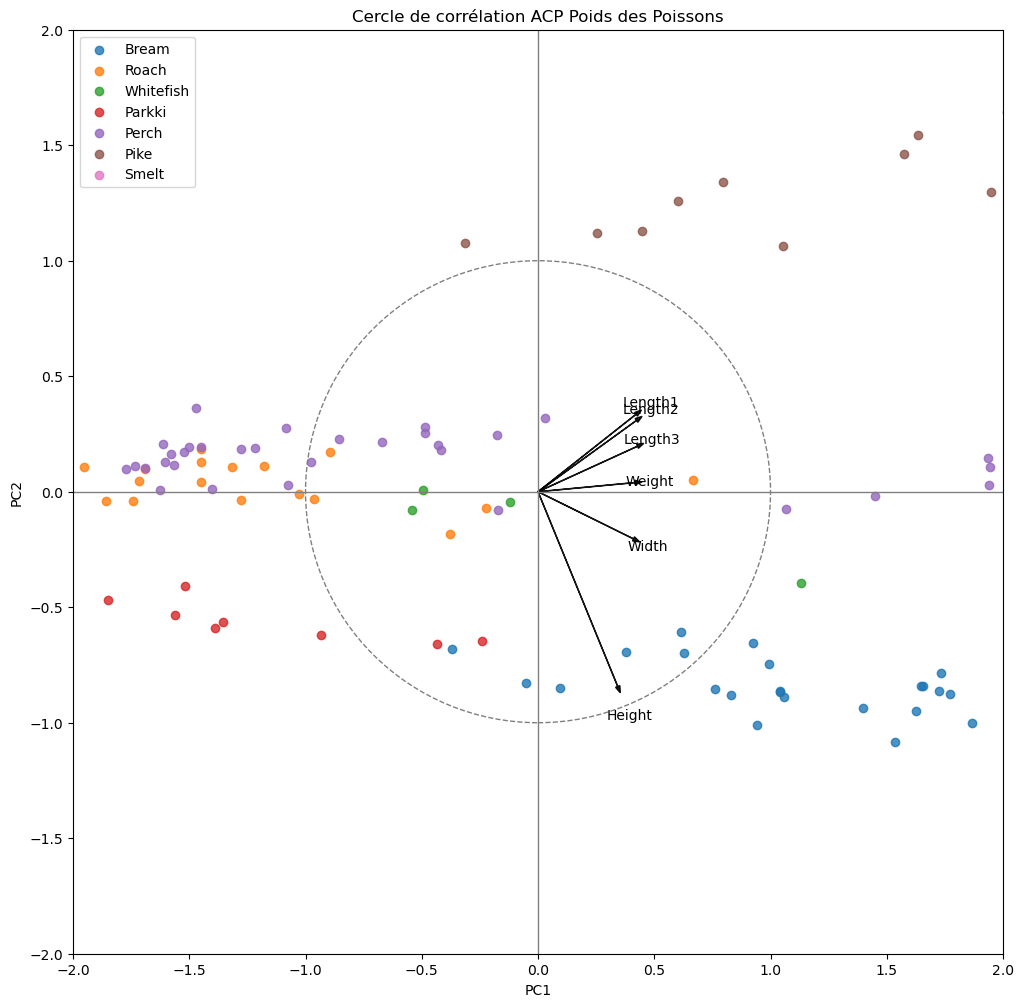

In [26]:
# Représentation graphique

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = 6

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces 
for specie in species :
    plt.scatter(data_pca[data.Species == specie, 0], data_pca[data.Species == specie, 1], alpha=.8,label=specie)

# Projeter les variables sur les axes factoriels
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data_quant.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Poids des Poissons')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()

# Définition du target et des features

In [27]:
X = pd.get_dummies(data.drop("Weight",axis=1),columns=["Species"],drop_first=True)
y = data["Weight"]

In [28]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [29]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

# Fonctions

In [30]:
def get_split_data(X,y):
    """Cette fonction effectue la division en données de train et de test des données 
    Paramètres
    -----------
    X : Serie ou dataframe contenant les observations des variables explicatives
    y: Serie ou dataframe contenant les observations de la variable cible
    Returns 
    -----------
    Retourne les données séparées en données d'apprentissage et données de test
    pour les variables explicatives et la variable cible"""
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train,X_test,y_train,y_test  

In [31]:
def standardisation(X_train,X_test):
    """Cette fonction opère la standardisation StandarScaler aux données
    Paramètres
    -----------
    X_train : Serie ou dataframe contenant les observations des variables explicatives pour l'apprentissage
    X_test : Serie ou dataframe contenant les observations des variables explicatives pour le test
    Returns 
    -----------
    Retourne les données standardisés"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [32]:
def get_model(name,X_train,y_train):
    """Cette fonction entraîne un modèle de regression sur les données de train
    Paramètres
    -----------
    name : identifiant du modèle.
    X_train : Serie ou dataframe contenant les observations des variables explicatives pour l'apprentissage
    y_train: Serie ou dataframe contenant les observations de la variable cible pour l'apprentissage
    Returns 
    -----------
    Retourne le modèle entraîné"""
    if name == "Linear":
        model = LinearRegression()
    if name == "SVR":
        model = LinearSVR(C=3)
    elif name == "Tree":
        model = DecisionTreeRegressor()
    model.fit(X_train,y_train)    
    return model

In [33]:
def get_performance(model,X_train,X_test,y_train,y_test):
    """Cette fonction évalue les performances d'un modèle à l'entrainement et au test
    Paramètres
    -----------
    model : Modèle à évaluer
    X_train : Serie ou dataframe contenant les observations des variables explicatives pour l'apprentissage
    X_test : Serie ou dataframe contenant les observations des variables explicatives pour le test
    y_train : Serie ou dataframe contenant les observations de la variable cible pour l'apprentissage
    y_test : Serie ou dataframe contenant les observations de la variable cible pour le test
    Returns 
    -----------
    Retourne les performances du modèle à l'entraînement et au test"""
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train,y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train,y_pred_train)
    r2_train = r2_score(y_train,y_pred_train)
    
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test,y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test,y_pred_test)
    r2_test = r2_score(y_test,y_pred_test)
    
    performances = pd.DataFrame({"Metriques":["MSE","RMSE","MAE","R2-SCORE"],
                                "TRAIN":[mse_train,rmse_train,mae_train,r2_train],
                                "TEST":[mse_test,rmse_test,mae_test,r2_test]})
    print(performances)

In [34]:
def plot_performance(model,X,y):
    """Cette fonction trace les valeurs observées en fonction des valeurs prédites sur les données 
    Paramètres
    -----------
    model : Modèle à évaluer
    X : Serie ou dataframe contenant les observations des variables explicatives 
    y : Serie ou dataframe contenant les observations de la variable cible 
    Returns 
    -----------
    Retourne un scatterplot"""
    y_pred = model.predict(X)
    plt.figure(figsize=(8,8))
    plt.scatter(y,y_pred,color="blue")
    plt.plot(np.arange(0,1500,10),np.arange(0,1500,10),'r-')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.grid()

In [35]:
def get_residus(model,X_test,y_test):
    """Cette fonction calcule les erreus résiduelles
    Paramètres
    -----------
    model : Modèle à évaluer
    X_test : Serie ou dataframe contenant les observations des variables explicatives pour le test
    y_test : Serie ou dataframe contenant les observations de la variable cible pour le test
    Returns 
    -----------
    Retourne les résidus """
    y_pred = model.predict(X_test)
    residus = y_test - y_pred
    return residus

In [36]:
def test_residus_hypotheses(model,X_test,y_test):
    """Cette fonction vérifie les hypothèses de la regression linéaire basés sur les erreus résiduelles
    Paramètres
    -----------
    model : Modèle à évaluer
    X_test : Serie ou dataframe contenant les observations des variables explicatives pour le test
    y_test : Serie ou dataframe contenant les observations de la variable cible pour le test
    Returns 
    -----------
    Retourne un scatterplot des résidus en fonction des pédictions, un histogramme des résidus et leur moyenne"""
    y_pred = model.predict(X_test)
    residus = y_test - y_pred
    # Moyenne des résidus
    print(f"Moyenne des résidus :{residus.mean()}")
    
    # Création de la figure
    plt.subplots(2,1,figsize=(10, 10))
    # Test d'homoscédascité des erreurs résiduelles
    plt.subplot(2,1,1)
    plt.scatter(y_pred, residus)
    plt.title('Test d\'homoscédasticité')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    
    # Normalité des résidus
    plt.subplot(2,1,2)
    sns.histplot(abs(residus),kde=True)
    plt.title('Histogramme des erreurs résiduelles du modèle')
    plt.show()

In [37]:
def tune_hyperparameters(name,X_train, y_train, values):
    """
    Cette fonction effectue l'ajustement des hyperparamètres pour LinearSVR en utilisant GridSearchCV.
    
    Paramètres :
    - X_train : Caractéristiques de l'ensemble d'entraînement.
    - y_train : Étiquettes de l'ensemble d'entraînement.
    - C_values : Liste des valeurs de C à tester.
    
    Sortie :
    - best_depth : Meilleure valeur pour l'hyperparamètre max_depth.
    - best_score : Meilleur score obtenu
    - results : DataFrame contenant les résultats de la recherche en grille.
    """
    if name == "SVR": 
        # Créer un pipeline avec StandardScaler et DecisionTreeClassifier
        model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(random_state=42))])
    
        # Définir la grille de paramètres pour les valeurs de max_depth
        param_grid = {'svr__C': values}

        # Effectuer GridSearchCV
        grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
        grid.fit(X_train, y_train)

        # Obtienir la meilleure valeur d'hyperparamètre
        best_param = grid.best_params_['svr__C']
        
    elif name == "Tree" :
        
        # Créer un pipeline avec StandardScaler et DecisionTreeClassifier
        model = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeRegressor(random_state=42))])
    
        # Définir la grille de paramètres pour les valeurs de max_depth
        param_grid = {'tree__max_depth': values}

        # Effectuer GridSearchCV
        grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
        grid.fit(X_train, y_train)

        # Obtienir la meilleure valeur d'hyperparamètre
        best_param = grid.best_params_['tree__max_depth']
    
    # Obtenir le meilleur score 
    best_score = grid.best_score_

    # Afficher les résultats de la recherche en grille
    results = pd.DataFrame(grid.cv_results_)

    return best_param, best_score, results

# Modèles

## LinearRegression

In [38]:
X_train,X_test,y_train,y_test = get_split_data(X,y)
X_train_scaled,X_test_scaled = standardisation(X_train,X_test)
model = get_model("Linear",X_train_scaled,y_train)

In [39]:
get_performance(model,X_train_scaled,X_test_scaled,y_train,y_test)

  Metriques        TRAIN         TEST
0       MSE  8777.604783  7007.383190
1      RMSE    93.688872    83.710114
2       MAE    69.172842    65.300052
3  R2-SCORE     0.928596     0.950735


Text(0.5, 1.0, "Performance du modèle à l'entraînement")

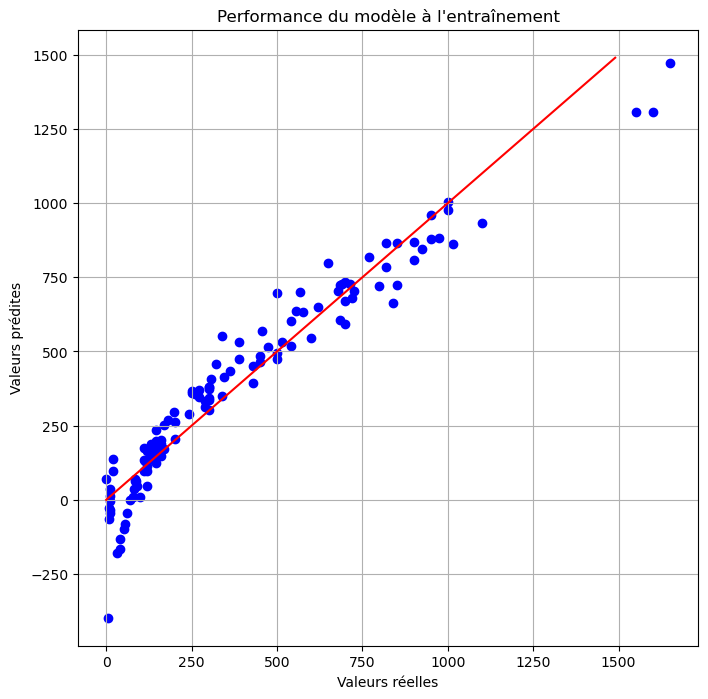

In [40]:
plot_performance(model,X_train_scaled,y_train)
plt.title("Performance du modèle à l'entraînement")

Text(0.5, 1.0, 'Performance du modèle au test')

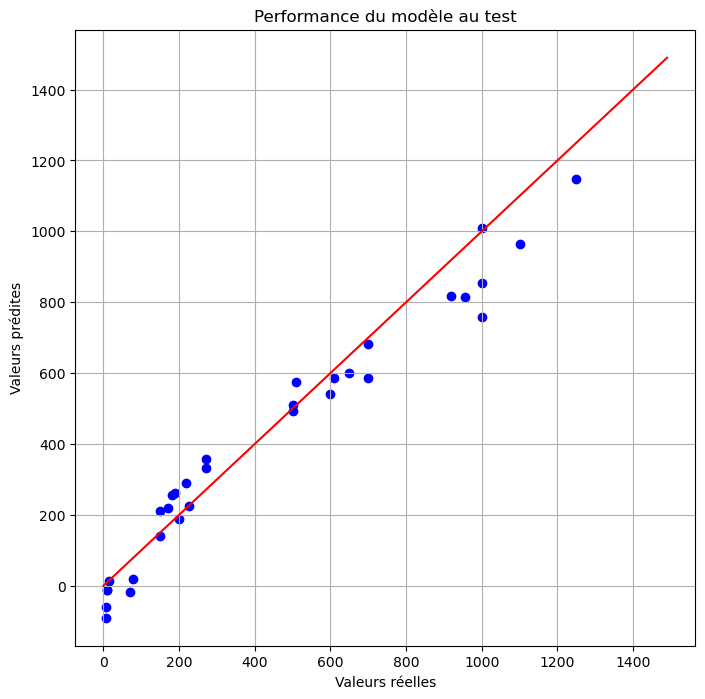

In [41]:
plot_performance(model,X_test_scaled,y_test)
plt.title("Performance du modèle au test")

Moyenne des résidus :29.84902523353377


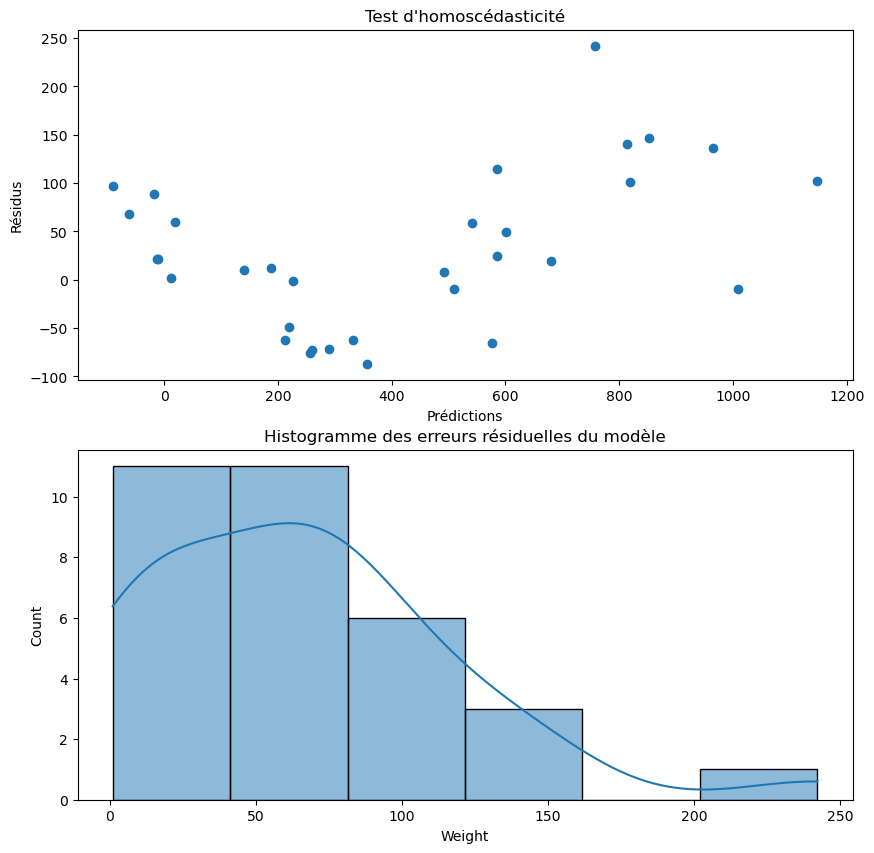

In [42]:
test_residus_hypotheses(model,X_test_scaled,y_test)

## LinearSVR

In [43]:
svr = get_model("SVR",X_train_scaled,y_train)

In [44]:
get_performance(svr,X_train_scaled,X_test_scaled,y_train,y_test)

  Metriques         TRAIN          TEST
0       MSE  45911.241617  56805.594167
1      RMSE    214.269087    238.339242
2       MAE    122.212239    160.689107
3  R2-SCORE      0.626520      0.600634


Text(0.5, 1.0, "Performance du modèle à l'entraînement")

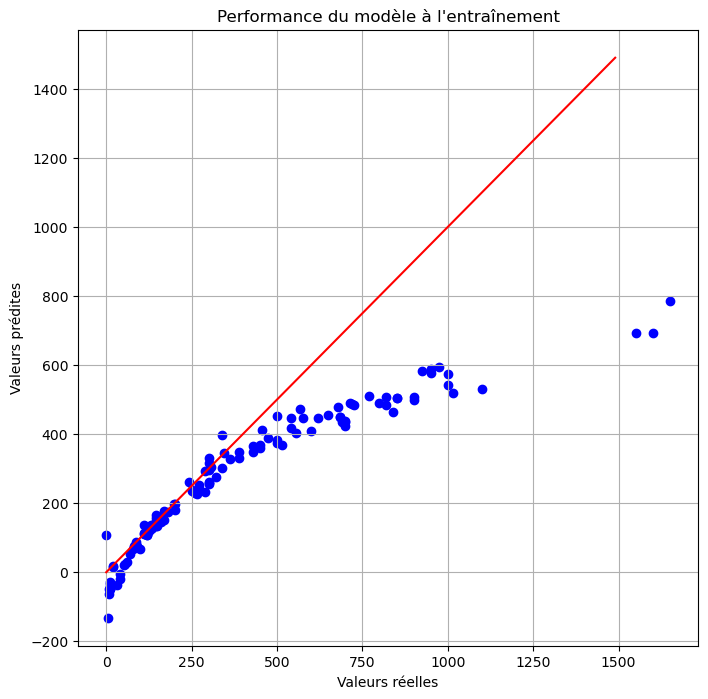

In [45]:
plot_performance(svr,X_train_scaled,y_train)
plt.title("Performance du modèle à l'entraînement")

Text(0.5, 1.0, 'Performance du modèle au test')

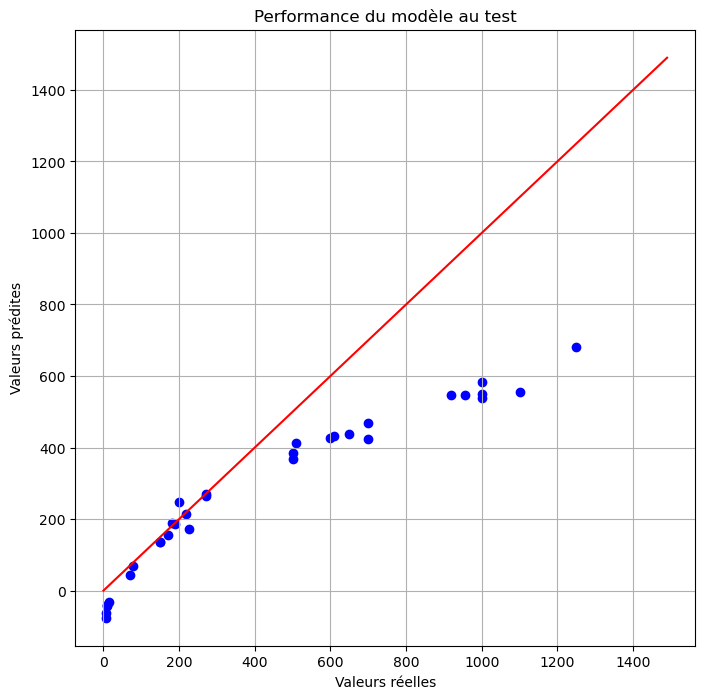

In [46]:
plot_performance(svr,X_test_scaled,y_test)
plt.title("Performance du modèle au test")

## DecisonTreeRegressor

In [47]:
tree = get_model("Tree",X_train_scaled,y_train)

In [48]:
get_performance(tree,X_train_scaled,X_test_scaled,y_train,y_test)

  Metriques     TRAIN         TEST
0       MSE  9.842520  8926.136875
1      RMSE  3.137279    94.478235
2       MAE  0.393701    52.087500
3  R2-SCORE  0.999920     0.937246


Text(0.5, 1.0, "Performance du modèle à l'entraînement")

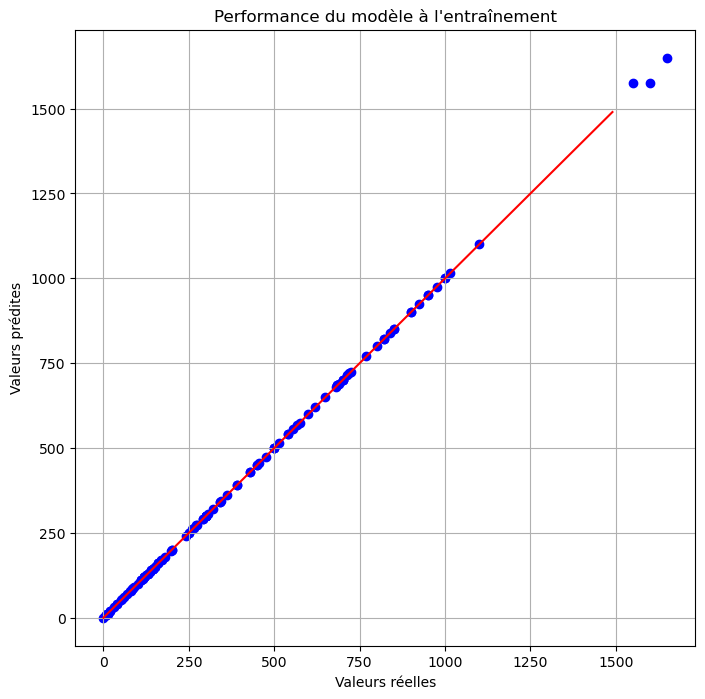

In [49]:
plot_performance(tree,X_train_scaled,y_train)
plt.title("Performance du modèle à l'entraînement")

Text(0.5, 1.0, 'Performance du modèle au test')

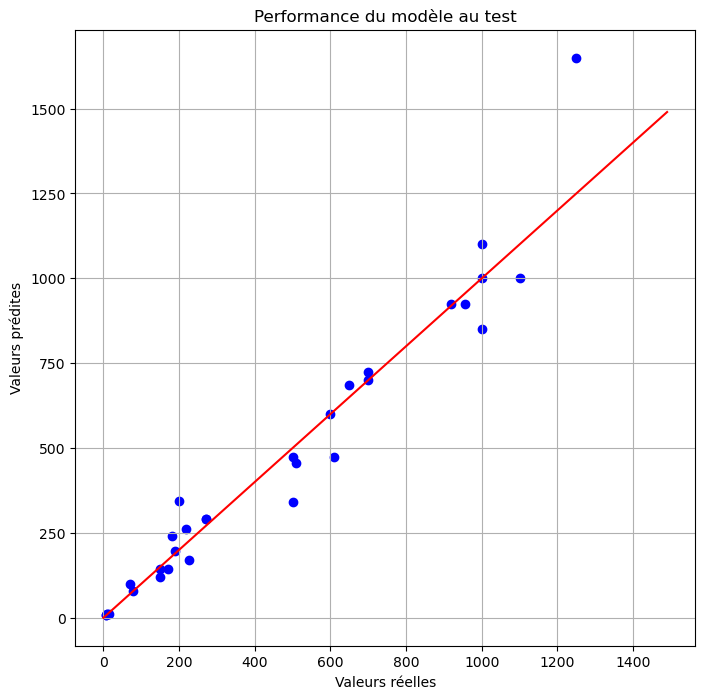

In [50]:
plot_performance(tree,X_test_scaled,y_test)
plt.title("Performance du modèle au test")

## Optimisation des hypermarètres avec GridSearchCV

In [51]:
best_C, best_score, results = tune_hyperparameters("SVR",X_train_scaled, y_train,[2,3,5,10,11,12,13,14,15,20,50,100,200])
print(f'Best value for C : {best_C}')
print(f'Best Score : {best_score}')
print(results[['param_svr__C', 'mean_test_score', 'std_test_score']])

Best value for C : 200
Best Score : 0.8952006507428647
   param_svr__C  mean_test_score  std_test_score
0             2         0.123391        0.039678
1             3         0.472539        0.049315
2             5         0.752407        0.064728
3            10         0.856781        0.060013
4            11         0.858295        0.059857
5            12         0.861233        0.062272
6            13         0.864698        0.066325
7            14         0.871694        0.062444
8            15         0.874915        0.060959
9            20         0.888898        0.059940
10           50         0.893538        0.059239
11          100         0.894459        0.059897
12          200         0.895201        0.060615


In [52]:
best_depth, best_score, results = tune_hyperparameters("Tree",X_train_scaled, y_train,[2,3,5,10,11,12,13,14,15,20,50,100,200])
print(f'Best value for max_depth : {best_depth}')
print(f'Best Score : {best_score}')
print(results[['param_tree__max_depth', 'mean_test_score', 'std_test_score']])

Best value for max_depth : 12
Best Score : 0.9666212877459339
   param_tree__max_depth  mean_test_score  std_test_score
0                      2         0.853928        0.061224
1                      3         0.940329        0.014460
2                      5         0.962161        0.013113
3                     10         0.965309        0.012381
4                     11         0.963201        0.011185
5                     12         0.966621        0.012272
6                     13         0.966621        0.012272
7                     14         0.966621        0.012272
8                     15         0.966621        0.012272
9                     20         0.966621        0.012272
10                    50         0.966621        0.012272
11                   100         0.966621        0.012272
12                   200         0.966621        0.012272
